# Assessing & Exploring 
Use [README file](http://www.fueleconomy.gov/feg/epadata/Readme.txt) or [This pdf](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to know more abou the datasets and columns\
Explore `all_alpha_08.csv` and `all_alpha_18.csv` and the questions below.

In [86]:
# 1- number of samples in each dataset?
# 2- number of columns in each dataset? 
# 3- duplicate rows in each dataset? 
# 4- number of features with missing values in both datasets?
# 5- datatypes of columns in each dataset ?
# 6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#           
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)?
# 8- how is the column "cyl" different in both datasets? (checkbox)
#                  A- Datatype  B- Number of unique value C- No of samples
# 9- What are the types of fuel present in each dataset ?
# 10- What are the fuel types that exist in a dataset and not the other? 

In [1]:
# import
import numpy as np
import pandas as pd

df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [88]:
# 1- number of samples and columns in each dataset? 
#df_08 
   #no of samples = 2404
   #no of columns = 18
df_08.shape
#df_18 
   #no of samples = 1611 
   #no of columns = 18
df_18.shape   

(1611, 18)

In [89]:
# 3- duplicate rows in each dataset?
#df_08 -> 25
df_08.duplicated().sum()
#df_18 -> 0
df_18.duplicated().sum()

0

In [90]:
# 4- number of features with missing values in 2008?
null_columns =df_08.columns[df_08.isna().any()]
num_null_columns = df_08[null_columns].isnull().sum()
num_null_columns

Cyl                     199
Trans                   199
Drive                    93
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
dtype: int64

In [91]:
# 4- number of features with missing values in 2018?
null_columns =df_18.columns[df_18.isna().any()]
num_null_columns = df_18[null_columns].isnull().sum()
num_null_columns


Displ    2
Cyl      2
dtype: int64

In [92]:
# 5- datatypes of columns in each dataset ?
df_08.dtypes
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [93]:
#6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#df_08
  #number of cols = 16
  #name of cols = ['Model', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd','Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr']
df_08.select_dtypes(exclude=['float64']).columns

#df_18
  #number of cols = 16
  #name of cols = ['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd','Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score','City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay','Comb CO2']
df_18.select_dtypes(exclude=['float64']).columns

Index(['Model', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd',
       'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay',
       'Comb CO2'],
      dtype='object')

In [94]:
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)
df_08.nunique(dropna = False)
df_18.nunique(dropna = False)


Model                   367
Displ                    37
Cyl                       8
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [95]:
# 8- how is the column "Cyl" different in both datasets?
#for df_08 Cyl is object
df_08['Cyl'].dtype
df_08['Cyl'].nunique()  #8
#for df_18 Cyl is float64
df_18['Cyl'].dtype
df_18['Cyl'].nunique() #7



7

In [96]:
# 9- What are the types of fuel present in each dataset ?
#df_08
df_08['Fuel'].unique()


array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [97]:
# 10- What are the types of fuel present in each dataset ?
#df_18
df_18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

# Cleaning

## Cleaning - Column Labels

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:\
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'\
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [98]:
# drop the columns from 2008
df_08 = df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis =1)
df_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,14,20,16,4,no
2400,VOLVO XC 90,4.4,(8 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,13,19,15,3,no
2401,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,FA,SUV,6,14,20,16,4,no
2402,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,FA,SUV,6,14,20,16,4,no


In [99]:
# drop the columns from 2018
df_18 = df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis =1)
df_18

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,standard SUV,5,22,28,24,5,No
1607,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,standard SUV,5,20,27,23,5,No
1608,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,standard SUV,5,20,27,23,5,No
1609,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,standard SUV,7,26/63,30/61,27/62,10,Elite


## Cleaning -  Rename Columns
**Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.**\
**Rename all column labels to replace spaces with underscores and convert everything to lowercase.**\
(Underscores can be much easier to work with in Python than spaces.\
For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query().\
Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [100]:
# rename the column
df_08 .rename( columns= {'Sales Area':'Cert Region'}, inplace = True)

In [101]:
# fix columns in both datasets
df_08.columns = df_08.columns.str.replace(' ', '_').str.lower()
df_18.columns = df_18.columns.str.replace(' ', '_').str.lower()

In [102]:
# confirm that both datasets share the exact column names:
df_08.columns.equals(df_18.columns)

True

In [103]:
# save the new datasets as "data_08_v1.csv" and 'data_18_v1.csv'.
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)


## Cleaning - Filter, Drop Nulls, Dedupe
For consistency, only compare cars certified by California standards.\
Filter both datasets using query to select only rows where "cert_region" is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

Use `data_08_v1.csv` and `data_18_v1.csv` that you just saved


### Filter by Certification Region

In [104]:
# filter datasets for rows following California standards using query
df_08_v1 = pd.read_csv('data_08_v1.csv')
df_18_v1 = pd.read_csv('data_18_v1.csv')

df_08_v1 = df_08_v1.query('cert_region == "CA"')
df_18_v1 = df_18_v1.query('cert_region == "CA"')

In [105]:
# confirm only certification region is California
df_08_v1['cert_region']
df_18_v1['cert_region']

1       CA
3       CA
4       CA
6       CA
8       CA
        ..
1601    CA
1603    CA
1605    CA
1607    CA
1609    CA
Name: cert_region, Length: 798, dtype: object

In [106]:
# drop certification region columns form both datasets
df_08_v1.drop(['cert_region'],axis =1, inplace = True)
df_18_v1.drop(['cert_region'],axis =1, inplace = True)

### Drop Rows with Missing Values

In [107]:
# drop rows with any null values in both datasets
df_08_v1.dropna(inplace = True)
df_18_v1.dropna(inplace = True)

In [108]:
# checks if any of the columns have null values
null_columns_08 =df_08_v1.columns[df_08_v1.isna().any()]
num_null_columns_08= df_08_v1[null_columns_08].isnull().sum()
num_null_columns_08
null_columns_18=df_18_v1.columns[df_18_v1.isna().any()]
num_null_columns_18 = df_18_v1[null_columns_18].isnull().sum()
num_null_columns_18

Series([], dtype: float64)

### Dedupe Data

In [109]:
# print number of duplicates in 2008 and 2018 datasets
df_08_v1.duplicated().sum()
df_18_v1.duplicated().sum()

3

In [110]:
# drop duplicates in both datasets
df_08_v1.drop_duplicates(inplace = True)
df_18_v1.drop_duplicates(inplace = True)

In [111]:
# confirm your changes
df_08_v1.duplicated().sum()
df_18_v1.duplicated().sum()

0

In [112]:
# check the shape of each dataset -- if the 2008 size isn't (986,13) and 2018 (794,13), you should probably cry.
df_08_v1.shape
df_18_v1.shape


(794, 13)

In [113]:
# make a checkpoint in case you mess up anything later


## Cleaning - Fixing Data Types


### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [114]:
# extract int from string in cyl in the 2008 dataset
df_08_v1['cyl'] = df_08_v1['cyl'].str.strip()
df_08_v1['cyl'] = df_08_v1['cyl'].str.replace('\D', '').astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\478841891.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_08_v1['cyl'] = df_08_v1['cyl'].str.replace('\D', '').astype(int)


In [115]:
# convert the data type of the "cyl" column in the 2018 dataset from float to int 
df_18_v1['cyl'] = df_18_v1['cyl'].astype(int)

In [116]:
# verify that the data type of the column in both datasets is "int"
df_08_v1['cyl'].dtype
df_18_v1['cyl'].dtype

dtype('int32')

### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [117]:
# try to change the data type to float
df_08_v1['air_pollution_score'] = df_08_v1['air_pollution_score'].str.strip()
df_08_v1['air_pollution_score'] = df_08_v1['air_pollution_score'].str.replace('\D', '').astype(float)

df_18_v1['air_pollution_score'] = df_18_v1['air_pollution_score'].astype(float)
df_18_v1['air_pollution_score'].dtype

C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\3139406666.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_08_v1['air_pollution_score'] = df_08_v1['air_pollution_score'].str.replace('\D', '').astype(float)


dtype('float64')

In [118]:
# you should have faced an error, get the row that caused that error


# It's not just the air pollution score!
The cars that have more than one type of fuel in a single row are hybrid (run on more than one type of fuel)! Multiple columns will be affected too!\
    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."\
This is why you can see that multiple columns contain more than one value


In [119]:
# You have two options here: (1) Split the row by "/" into two rows, (2) just drop the rows that contain the ("/") in any of the columns
# You will lose a point for each dataset if you go with the second option

In [120]:
# to split the rows---->
# 1- get the rows that contain / in the fuel column
df_08_hybrid = df_08_v1[df_08_v1['fuel'].str.contains('/')]
df_18_hybrid = df_18_v1[df_18_v1['fuel'].str.contains('/')]
# 2- make two copies of these rows
df1_08 = df_08_hybrid.copy()
df2_08 = df_08_hybrid.copy()
df1_18 = df_18_hybrid.copy()
df2_18 = df_18_hybrid.copy()
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
cols_to_split = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the /  
for col in cols_to_split:
    df1_08[col] = df_08_hybrid[col].astype(str).apply(lambda x: x.split('/')[0].strip())
    df2_08[col] = df_08_hybrid[col].astype(str).apply(lambda x: x.split('/')[1].strip() if len(x.split('/')) > 1 else '')
    df1_18[col] = df_18_hybrid[col].astype(str).apply(lambda x: x.split('/')[0].strip())
    df2_18[col] = df_18_hybrid[col].astype(str).apply(lambda x: x.split('/')[1].strip() if len(x.split('/')) > 1 else '')
# 5- drop the original row from the dataset
df_08_v1.drop(df_08_hybrid.index, inplace=True)
df_18_v1.drop(df_18_hybrid.index, inplace=True)
# 6- append the newely created rows to the original dataframe
df_08_v1 = df_08_v1.append(df1_08.append(df2_08)).reset_index(drop=True)
df_18_v1 = df_18_v1.append(df1_18.append(df2_18)).reset_index(drop=True)
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\3705973844.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_08_v1 = df_08_v1.append(df1_08.append(df2_08)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\3705973844.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_08_v1 = df_08_v1.append(df1_08.append(df2_08)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\3705973844.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18_v1 = df_18_v1.append(df1_18.append(df2_18)).reset_index(drop=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16852\3705973844.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [121]:
df_08_v1['greenhouse_gas_score']

0        4
1        5
2        5
3        6
4        6
      ... 
982      4
983      4
984      3
985    7/6
986    7/6
Name: greenhouse_gas_score, Length: 987, dtype: object

This is the row before splitting\
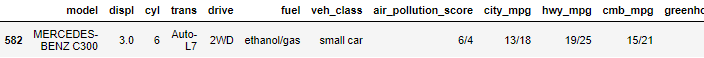

This what it should look like after splitting\
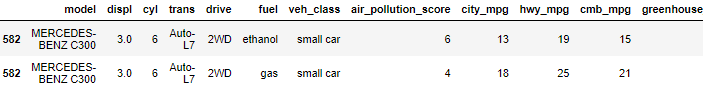

In [122]:
# check that there are no hybrid cars in the 2008 dataset anymore:
df_08_v1[df_08_v1['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


### Repeat this process for the 2018 dataset

In [123]:
# do whatever you did in the previous cells
#Done

In [124]:
# now, try to change the data type again

# for 2008, convert string to float
for col in ['city_mpg', 'hwy_mpg', 'cmb_mpg']:
  df_08_v1[col] = df_08_v1[col].replace('', np.nan)
  df_08_v1[col] = df_08_v1[col].astype(float)

# for 2018, convert int to float
  df_18_v1['cyl'] = df_18_v1['cyl'].astype(float)


df_08_v1.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [79]:
# check the data type of the columns
df_08_v1.dtypes
df_18_v1.dtypes


model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [129]:
# convert to float
for col in ['city_mpg', 'hwy_mpg', 'cmb_mpg']:
  df_18_v1[col] = df_18_v1[col].astype(float)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [125]:
# convert the data type from float to int in the 2008 dataset
hybrid_rows = df_08_v1['greenhouse_gas_score'].str.contains('/')
df_08_v1.loc[hybrid_rows, 'greenhouse_gas_score'] = 7 
df_08_v1['greenhouse_gas_score'] = df_08_v1['greenhouse_gas_score'].astype(int)
df_08_v1.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [138]:
#### check that all columns and their data type in the 2008 dataset matches excatly the ones in the 2018 dataset
#### all columns MUST be the same data type
df_18_v1['greenhouse_gas_score'] = df_18_v1['greenhouse_gas_score'].astype(int)
df_08_v1['cyl'] = df_08_v1['cyl'].astype(float)
for col in df_08_v1.columns:
    if col in df_18_v1.columns:
        if df_08_v1[col].dtype != df_18_v1[col].dtype:
            print(f"column '{col}' is not the same in both datasets.")

In [139]:
# check the shape of both datasets
df_08_v1.shape
df_18_v1.shape

(987, 13)

In [141]:
# Save your final CLEAN datasets as "clean_08.csv" and "clean_18.csv"
df_08_v1.to_csv('clean_08.csv', index=False)
df_18_v1.to_csv('clean_18.csv', index=False)